[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Advice Topics:
Topic 1: code hard class understand learn
Topic 2: study class practice fast review
Topic 3: class work time learning think
Topic 4: textbook read chapter material time
Topic 5: sure make homework understand time

Challenge Topics:
Topic 1: code hard class understand learn
Topic 2: study class practice fast review
Topic 3: class work time learning think
Topic 4: textbook read chapter material time
Topic 5: sure make homework understand time

Sentiment Analysis:
Average Advice Sentiment: 0.08783088059072469
Average Challenge Sentiment: 0.08783088059072469

Named Entities:
first              27
hours              13
one                12
Jupyter             8
R.                  7
One                 6
CourseKata          6
TA                  6
the last minute     6
each week           5
Name: entities, dtype: int64


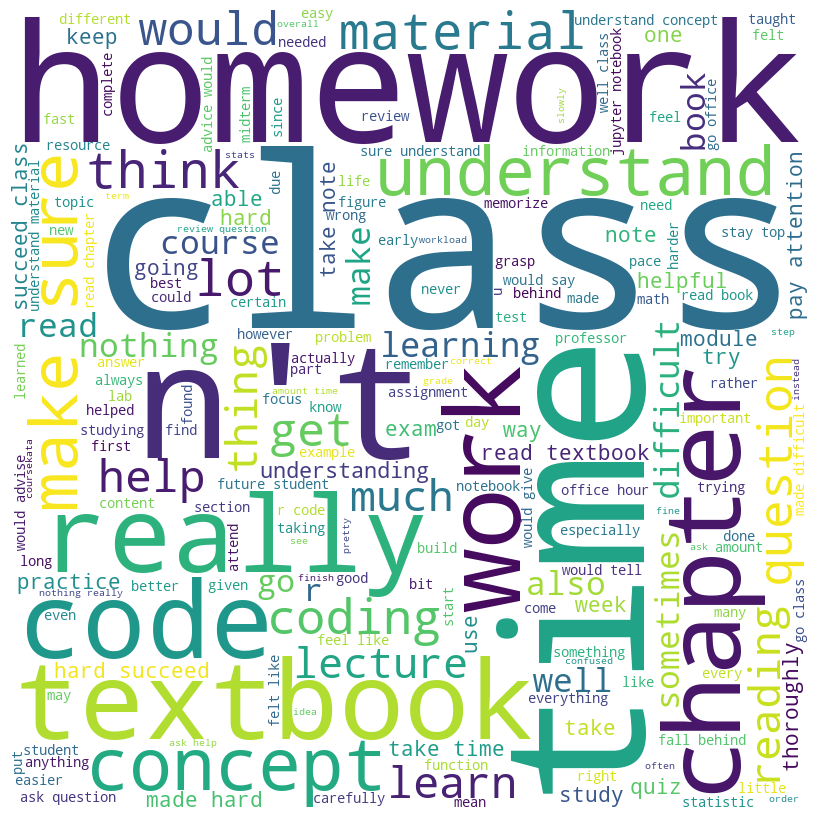

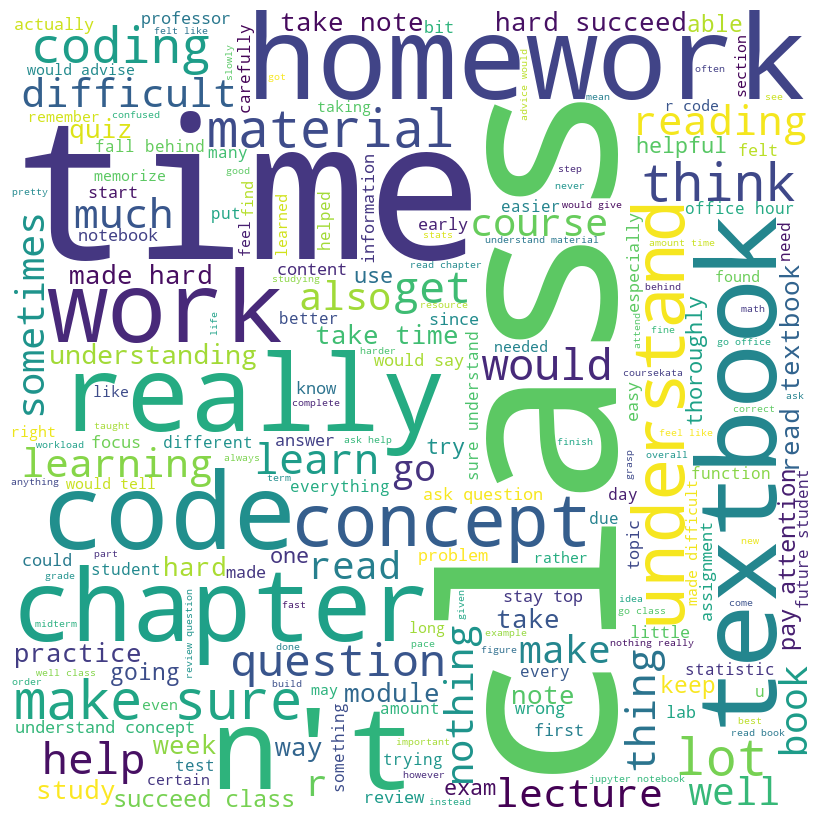

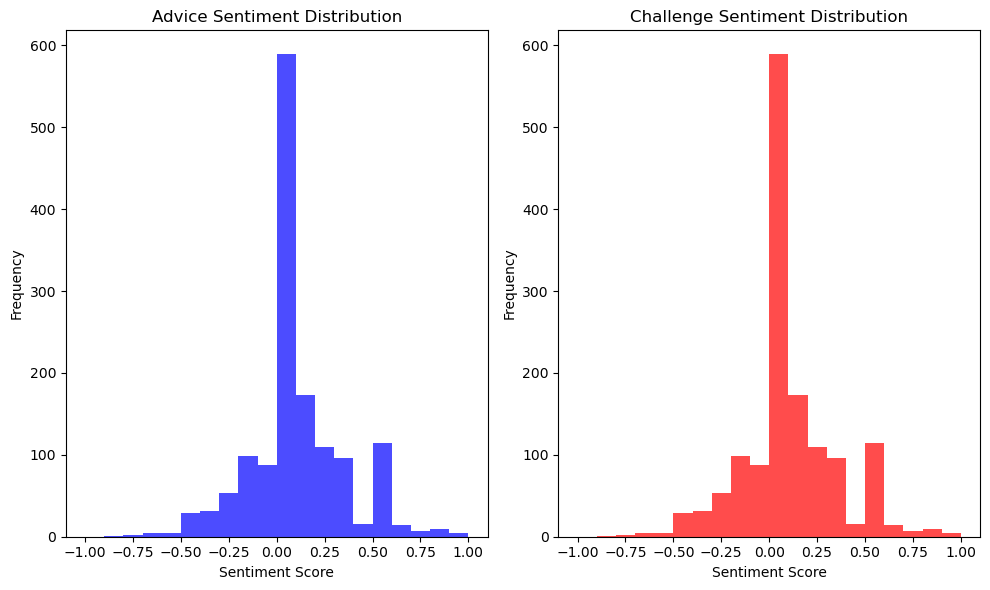

In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Read the data from the CSV file
data = pd.read_csv('../Data/semantic_questions_large.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(lemmatized_tokens)

data['preprocessed_advice'] = data['response'].apply(preprocess_text)
data['preprocessed_challenge'] = data['response'].apply(preprocess_text)

# Topic Modeling - Advice
advice_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
advice_tfidf = advice_vectorizer.fit_transform(data['preprocessed_advice'])

lda_advice = LatentDirichletAllocation(n_components=5, random_state=42)
lda_advice.fit(advice_tfidf)

advice_topics = {}
for topic_idx, topic in enumerate(lda_advice.components_):
    topic_words = [advice_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    advice_topics[topic_idx] = ' '.join(topic_words)

print("Advice Topics:")
for topic_idx, topic_words in advice_topics.items():
    print(f"Topic {topic_idx+1}: {topic_words}")

# Topic Modeling - Challenges
challenge_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
challenge_tfidf = challenge_vectorizer.fit_transform(data['preprocessed_challenge'])

lda_challenge = LatentDirichletAllocation(n_components=5, random_state=42)
lda_challenge.fit(challenge_tfidf)

challenge_topics = {}
for topic_idx, topic in enumerate(lda_challenge.components_):
    topic_words = [challenge_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    challenge_topics[topic_idx] = ' '.join(topic_words)

print("\nChallenge Topics:")
for topic_idx, topic_words in challenge_topics.items():
    print(f"Topic {topic_idx+1}: {topic_words}")

# Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['advice_sentiment'] = data['response'].apply(get_sentiment)
data['challenge_sentiment'] = data['response'].apply(get_sentiment)

print("\nSentiment Analysis:")
print("Average Advice Sentiment:", data['advice_sentiment'].mean())
print("Average Challenge Sentiment:", data['challenge_sentiment'].mean())

# Named Entity Recognition
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

data['entities'] = data['response'].apply(extract_entities)

print("\nNamed Entities:")
print(data['entities'].explode().value_counts().nlargest(10))

# Word Cloud - Advice
advice_text = ' '.join(data['preprocessed_advice'])
advice_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(advice_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(advice_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('advice_wordcloud.png')
plt.show()

# Word Cloud - Challenges
challenge_text = ' '.join(data['preprocessed_challenge'])
challenge_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stop_words, min_font_size=10).generate(challenge_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(challenge_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('challenge_wordcloud.png')
plt.show()

# Sentiment Distribution Plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(data['advice_sentiment'], bins=20, range=(-1, 1), color='blue', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Advice Sentiment Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['challenge_sentiment'], bins=20, range=(-1, 1), color='red', alpha=0.7)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Challenge Sentiment Distribution')

plt.tight_layout()
plt.savefig('sentiment_distribution.png')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/arneshsaha/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Advice Topics:
Topic 1: code hard class understand learn
Topic 2: study class practice fast review
Topic 3: class work time learning think
Topic 4: textbook read chapter material time
Topic 5: sure make homework understand time

Challenge Topics:
Topic 1: code hard class understand learn
Topic 2: study class practice fast review
Topic 3: class work time learning think
Topic 4: textbook read chapter material time
Topic 5: sure make homework understand time

Sentiment Analysis:
Average Advice Sentiment: 0.08783088059072469
Average Challenge Sentiment: 0.08783088059072469

Named Entities:
first              27
hours              13
one                12
Jupyter             8
R.                  7
One                 6
CourseKata          6
TA                  6
the last minute     6
each week           5
Name: entities, dtype: int64


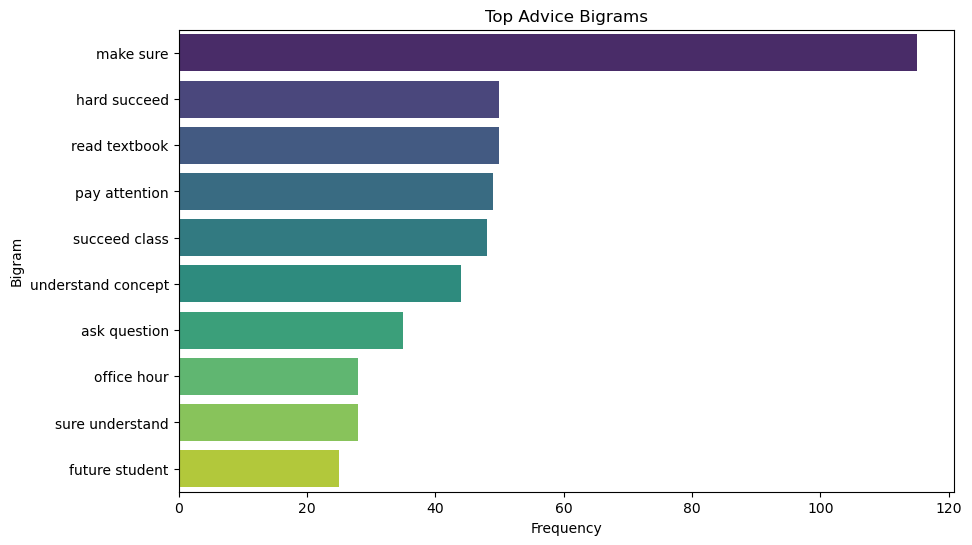

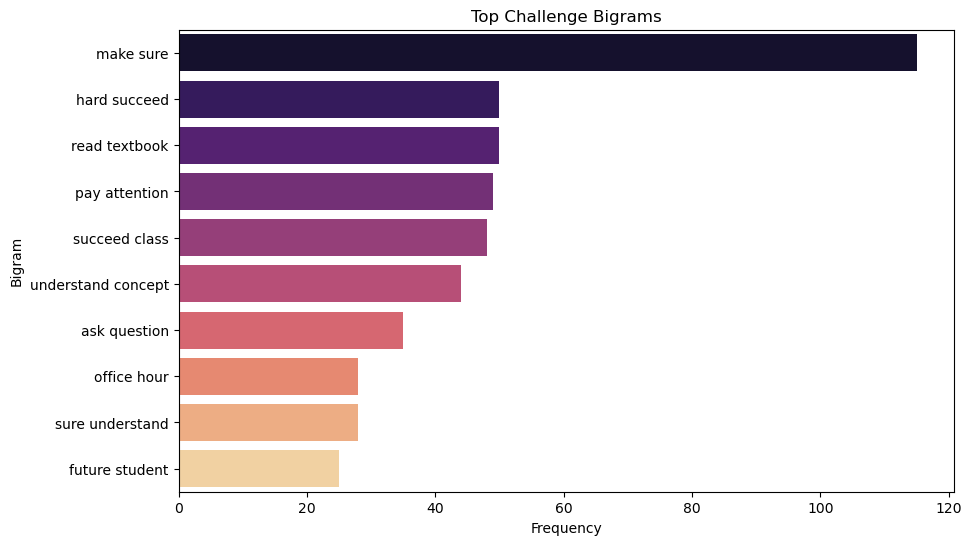

/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_56432/1261991970.py:126: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['advice_sentiment'], shade=True, color='blue', label='Advice')
/var/folders/rv/l0bvb2qx7kj9z133h3zxt1040000gn/T/ipykernel_56432/1261991970.py:127: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['challenge_sentiment'], shade=True, color='red', label='Challenge')


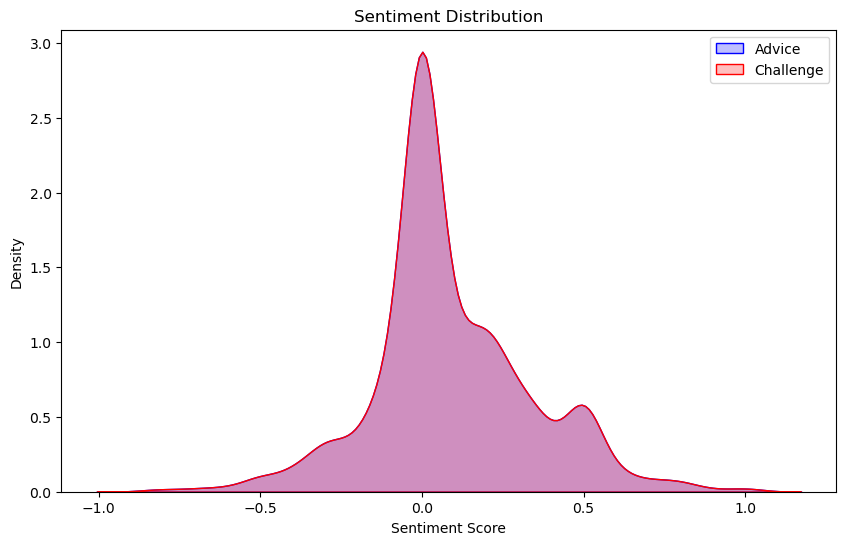

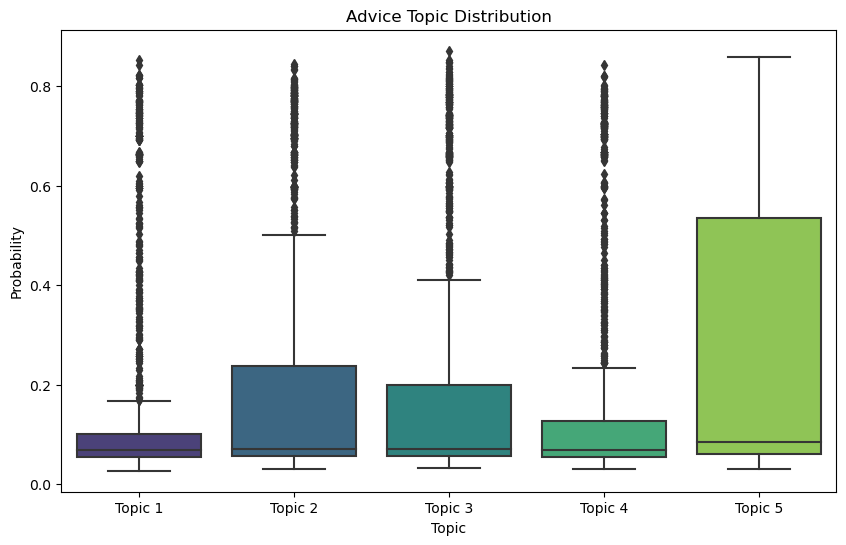

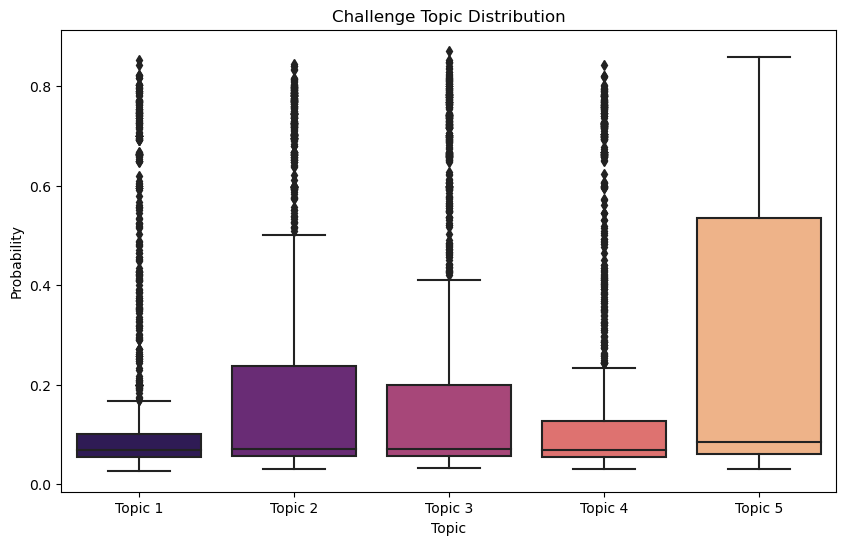

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from textblob import TextBlob
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Load spaCy English model
nlp = spacy.load('en_core_web_sm')

# Read the data from the CSV file
data = pd.read_csv('../Data/semantic_questions_large.csv')

# Preprocess the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    
    # Remove stopwords and lemmatize the tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    return ' '.join(lemmatized_tokens)

data['preprocessed_advice'] = data['response'].apply(preprocess_text)
data['preprocessed_challenge'] = data['response'].apply(preprocess_text)

# Topic Modeling - Advice
advice_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
advice_tfidf = advice_vectorizer.fit_transform(data['preprocessed_advice'])

lda_advice = LatentDirichletAllocation(n_components=5, random_state=42)
lda_advice.fit(advice_tfidf)

advice_topics = {}
for topic_idx, topic in enumerate(lda_advice.components_):
    topic_words = [advice_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    advice_topics[topic_idx] = ' '.join(topic_words)

print("Advice Topics:")
for topic_idx, topic_words in advice_topics.items():
    print(f"Topic {topic_idx+1}: {topic_words}")

# Topic Modeling - Challenges
challenge_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
challenge_tfidf = challenge_vectorizer.fit_transform(data['preprocessed_challenge'])

lda_challenge = LatentDirichletAllocation(n_components=5, random_state=42)
lda_challenge.fit(challenge_tfidf)

challenge_topics = {}
for topic_idx, topic in enumerate(lda_challenge.components_):
    topic_words = [challenge_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-6:-1]]
    challenge_topics[topic_idx] = ' '.join(topic_words)

print("\nChallenge Topics:")
for topic_idx, topic_words in challenge_topics.items():
    print(f"Topic {topic_idx+1}: {topic_words}")

# Sentiment Analysis
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

data['advice_sentiment'] = data['response'].apply(get_sentiment)
data['challenge_sentiment'] = data['response'].apply(get_sentiment)

print("\nSentiment Analysis:")
print("Average Advice Sentiment:", data['advice_sentiment'].mean())
print("Average Challenge Sentiment:", data['challenge_sentiment'].mean())

# Named Entity Recognition
def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents]

data['entities'] = data['response'].apply(extract_entities)

print("\nNamed Entities:")
print(data['entities'].explode().value_counts().nlargest(10))

# Bigram Analysis - Advice
advice_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(data['preprocessed_advice'])
advice_bigram_counts = advice_bigrams.transform(data['preprocessed_advice'])
advice_bigram_df = pd.DataFrame(advice_bigram_counts.toarray(), columns=advice_bigrams.get_feature_names_out())
top_advice_bigrams = advice_bigram_df.sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_advice_bigrams.values, y=top_advice_bigrams.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top Advice Bigrams')
plt.savefig('advice_bigrams.png')
plt.show()

# Bigram Analysis - Challenges
challenge_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(data['preprocessed_challenge'])
challenge_bigram_counts = challenge_bigrams.transform(data['preprocessed_challenge'])
challenge_bigram_df = pd.DataFrame(challenge_bigram_counts.toarray(), columns=challenge_bigrams.get_feature_names_out())
top_challenge_bigrams = challenge_bigram_df.sum().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_challenge_bigrams.values, y=top_challenge_bigrams.index, palette='magma')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.title('Top Challenge Bigrams')
plt.savefig('challenge_bigrams.png')
plt.show()

# Sentiment Distribution Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data['advice_sentiment'], shade=True, color='blue', label='Advice')
sns.kdeplot(data['challenge_sentiment'], shade=True, color='red', label='Challenge')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.title('Sentiment Distribution')
plt.legend()
plt.savefig('sentiment_distribution.png')
plt.show()

# Topic Distribution Plot - Advice
advice_topic_probs = lda_advice.transform(advice_tfidf)
advice_topic_labels = [f"Topic {i+1}" for i in range(lda_advice.n_components)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(advice_topic_probs, columns=advice_topic_labels), palette='viridis')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Advice Topic Distribution')
plt.savefig('advice_topic_distribution.png')
plt.show()

# Topic Distribution Plot - Challenges
challenge_topic_probs = lda_challenge.transform(challenge_tfidf)
challenge_topic_labels = [f"Topic {i+1}" for i in range(lda_challenge.n_components)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(challenge_topic_probs, columns=challenge_topic_labels), palette='magma')
plt.xlabel('Topic')
plt.ylabel('Probability')
plt.title('Challenge Topic Distribution')
plt.savefig('challenge_topic_distribution.png')
plt.show()